# Loading Relevant Libraries 📚

In [ ]:
# import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.auth import default

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading &  Data inspection

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
spreadsheet = gc.open("UCI_Credit_Card")

In [ ]:
df = pd.DataFrame(spreadsheet.sheet1.get_all_records())

In [ ]:
# remap the dataset
df['SEX'] = df['SEX'].map({1:'male',2:'female'})
df['EDUCATION']=df['EDUCATION'].map({1:'graduate school',
                                    2:'university',
                                    3:'high school',
                                    4:'others'})
df['MARRIAGE'] = df['MARRIAGE'].map({1:'married',
                                     2:'single',
                                     3:'others'})


In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   29655 non-null  object 
 4   MARRIAGE                    29946 non-null  object 
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# function to get mem usage
def get_df_memory_usage(df, top_columns=5):
    print("Memory usage ---")
    memory_per_column = df.memory_usage(deep=True)/(1024**2)
    print(f"Top{top_columns}columns by memory (MB)")
    print(memory_per_column.sort_values(ascending=False).head(top_columns))
    print(f"Total size: {memory_per_column.sum():.2f}MB")

In [ ]:
#explore the mem used
get_df_memory_usage(df,5)

Memory usage ---
Top5columns by memory (MB)
EDUCATION    1.960063
MARRIAGE     1.813874
SEX          1.779770
BILL_AMT1    0.228882
BILL_AMT3    0.228882
dtype: float64
Total size: 10.59MB


In [ ]:
#downcast the age column using the float datatype
df['AGE'] = pd.to_numeric(df['AGE'],downcast="float")
get_df_memory_usage(df)

Memory usage ---
Top5columns by memory (MB)
EDUCATION    1.960063
MARRIAGE     1.813874
SEX          1.779770
BILL_AMT1    0.228882
BILL_AMT3    0.228882
dtype: float64
Total size: 10.47MB


In [ ]:
# get summary stats of the numeric variables
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.50,8660.40,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.49,9.22,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.27,1.13,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.29,1.15,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.33,73635.86,-165580.0,3558.75,22381.5,67091.00,964511.0


In [ ]:
# summary stats of the categorial variables:
df.describe(include="object").transpose()

,count,unique,top,freq
SEX,30000,2,female,18112
EDUCATION,29655,4,university,14030
MARRIAGE,29946,3,single,15964


# Exploratory Data Analysis 🔎

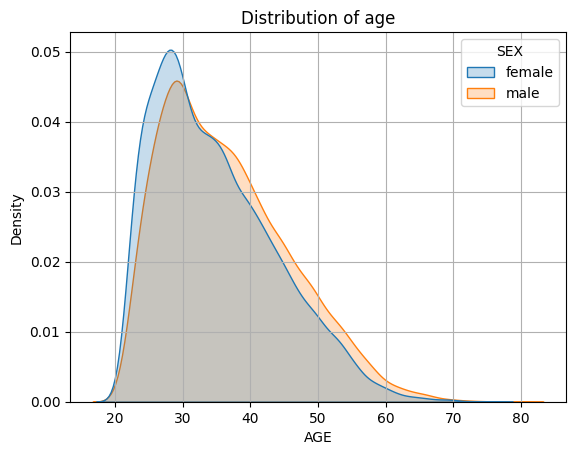

In [ ]:
# plot the distribution of age and split it by sex:

ax = sns.kdeplot(data = df ,x='AGE',
                 hue='SEX',common_norm =False,
                 fill =True)

ax.set_title("Distribution of age")

# Add gridlines
plt.grid(True)

There is no much difference in the shape of the distribution per sex. The female sample is slightly younger, on average

Text(0.5, 0.98, 'Pairplot of Selected Variables')

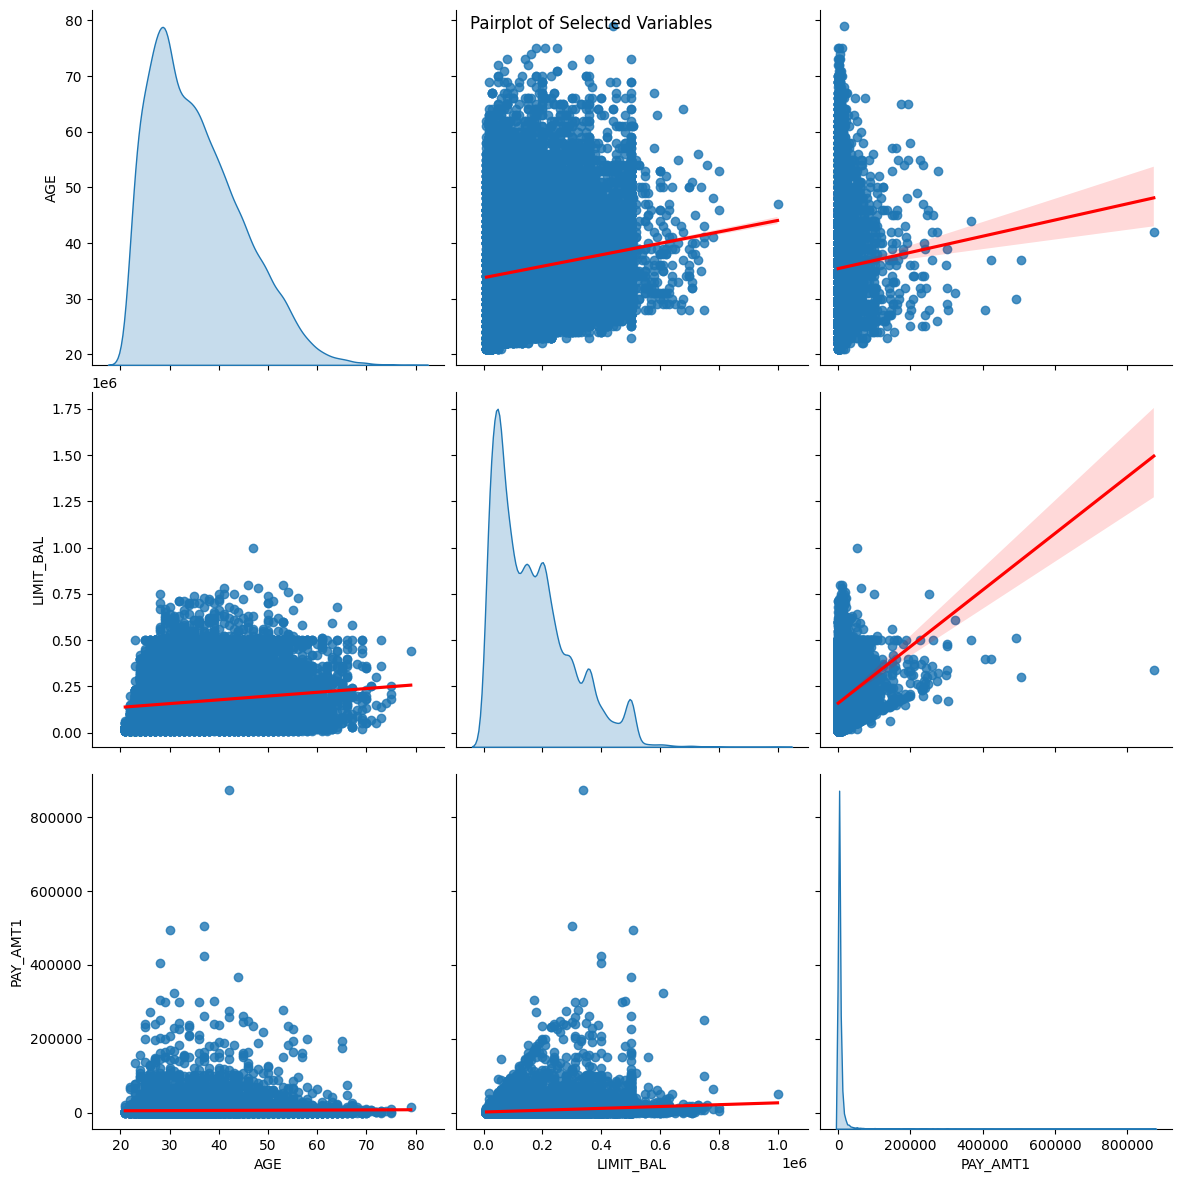

In [ ]:
cols_to_plt = ['AGE','LIMIT_BAL','PAY_AMT1']
pair_plot = sns.pairplot(df[cols_to_plt],
                         kind='reg',
                         diag_kind='kde',
                         height = 4,
                         plot_kws ={'line_kws':{'color':'red'}})
pair_plot.fig.suptitle("Pairplot of Selected Variables")

- The distribution of payment amount 1 is highly skewed as it has a long tail.
- There are very extreme values in the scatterplots.

Text(0.5, 0.98, 'Pairplot of Selected Variables')

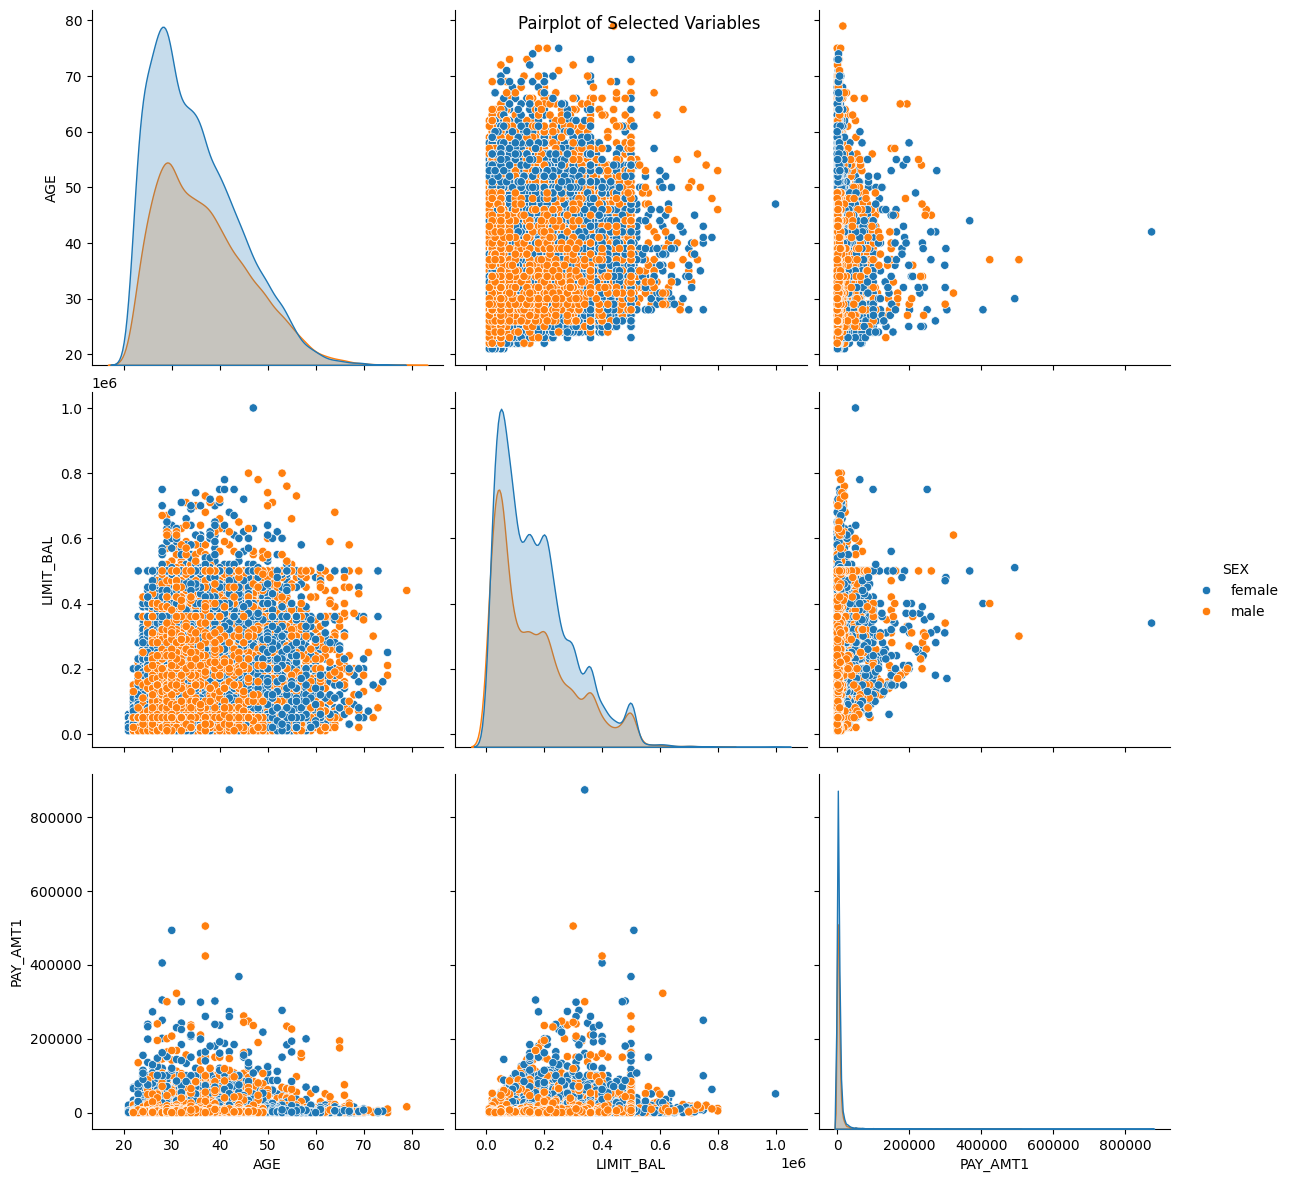

In [ ]:
pair_plot = sns.pairplot(data=df,
                         x_vars=cols_to_plt,
                         y_vars=cols_to_plt,
                         hue='SEX',
                         height = 4)
pair_plot.fig.suptitle("Pairplot of Selected Variables")

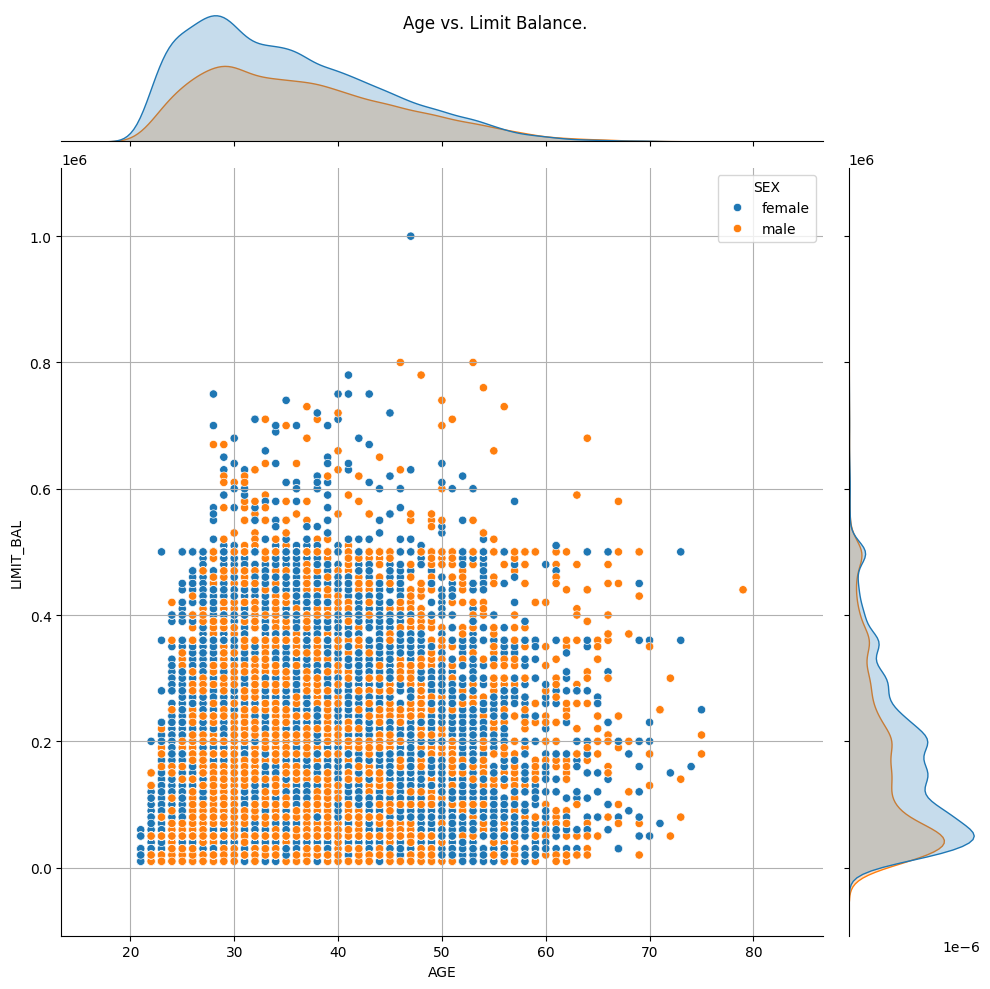

In [ ]:
# analyse the relationship btwn age and limit balance
ax = sns.jointplot(data=df,
                   x='AGE',
                   y='LIMIT_BAL',
                   hue ='SEX',
                   height = 10,)
ax.fig.suptitle("Age vs. Limit Balance.")
# Add gridlines
plt.grid(True)

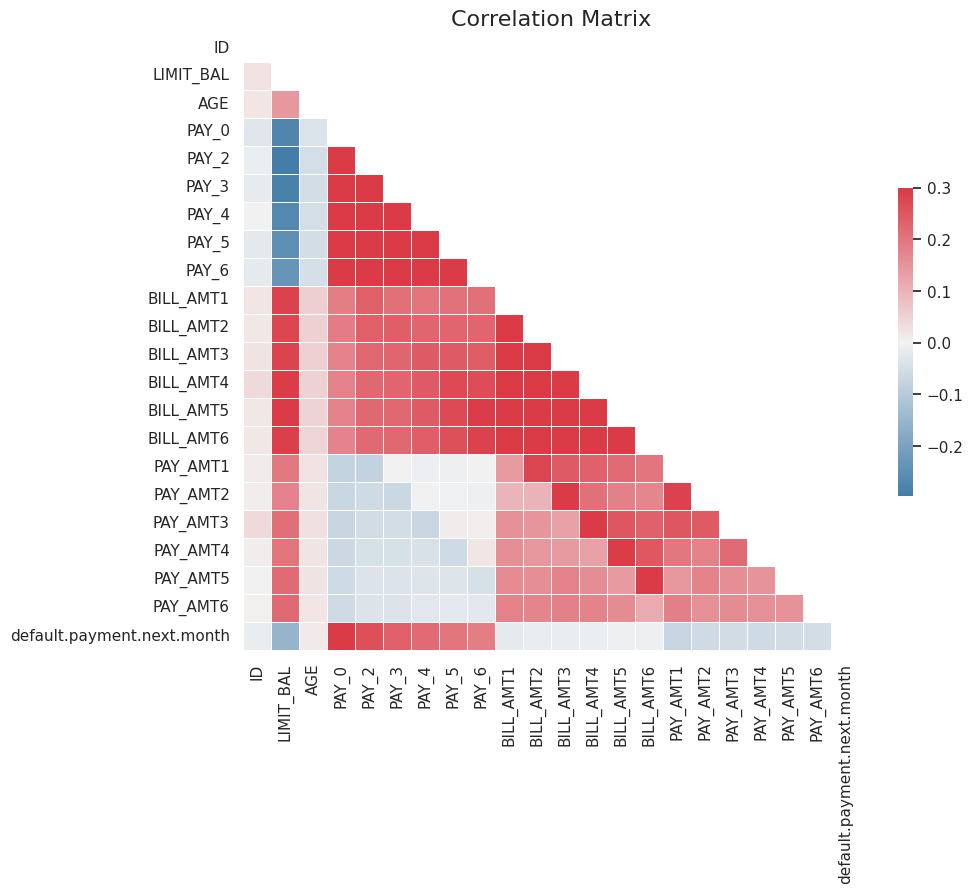

In [ ]:


def plot_correlation_matrix(corr_mat):
    sns.set(style="white")  # Set the style to 'white'

    # Create a mask for the upper triangle
    mask = np.zeros_like(corr_mat, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size

    # Define a diverging color palette
    cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

    # Create the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_mat, mask=mask, cmap=cmap,
                vmax=.3, center=0, square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

    # Set title
    ax.set_title("Correlation Matrix", fontsize=16)

    # Revert the style to darkgrid if needed after the plot
    sns.set(style="darkgrid")

# Example of usage with a DataFrame `df`
corr_mat = df.select_dtypes(include="number").corr()
plot_correlation_matrix(corr_mat)


*Positive Correlations:*

Variables such as BILL_AMT1 through BILL_AMT6 (probably billing amounts at different time periods) show strong positive correlations with each other (deep red). This means the billing amounts at different times are highly related, which is intuitive—people who have high bills one month are likely to have high bills in other months.

PAY_AMT1 through PAY_AMT6 (payment amounts) also show some level of correlation with each other, although the color is lighter, suggesting a weaker positive relationship.

*Negative Correlations:*

There are visible blue squares between PAY variables (PAY_0 to PAY_6) and BILL_AMT1 to BILL_AMT6, which indicate negative correlations. This suggests that as the pay status (delays in payments) increases, the bill amounts may decrease, possibly indicating better payment behavior linked with lower bills.
Weak or Neutral Correlations:

Variables like ID, AGE, and default.payment.next.month have very weak correlations with most other variables, indicated by the white squares. This suggests that these variables are not strongly related to the others in the dataset.

*Summary:*
Strong Positive Correlations: Found between the billing amounts (BILL_AMT1 to BILL_AMT6).
Negative Correlations: Noted between the pay status variables (PAY_0 to PAY_6) and bill amounts.
Neutral Correlations: Observed in variables like ID, AGE, and default.payment.next.month with other features.

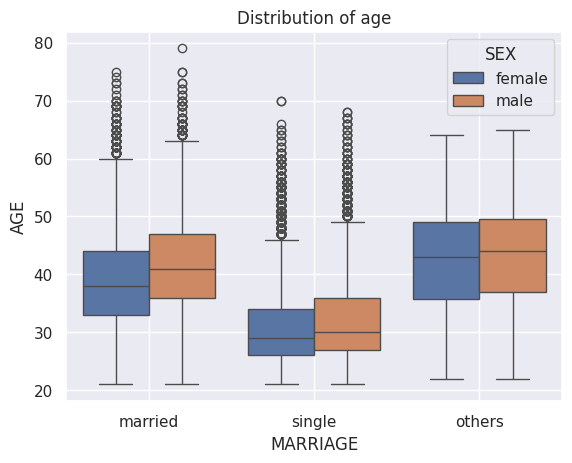

In [ ]:
# Analyse the distribution of age using boxplots
ax = sns.boxplot(data=df,
                 y="AGE",
                 x="MARRIAGE",
                 hue = "SEX")
# set the title of the graph
ax.set_title("Distribution of age")

# Add gridlines
plt.grid(True)

- The distributions are quite similar within marital groups, with men always having a higher median age.

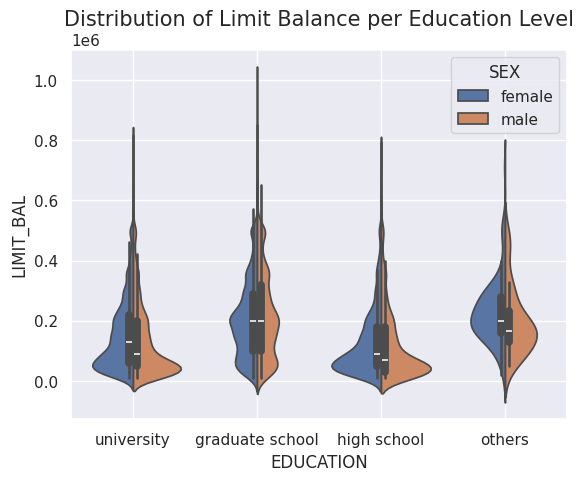

In [ ]:
# ploting the limit blanace for each sex and education level

ax = sns. violinplot(x="EDUCATION",
                     y ="LIMIT_BAL",
                     hue ="SEX",
                     split = True,
                     data = df)

# set the title for the plot
ax.set_title("Distribution of Limit Balance per Education Level", fontsize=15)

# Add gridlines
plt.grid(True)

- The largest balance appears in the group with the Graduate school level of education.
- The shape of the distribution is different per education level
- There are few difference between the sexes.

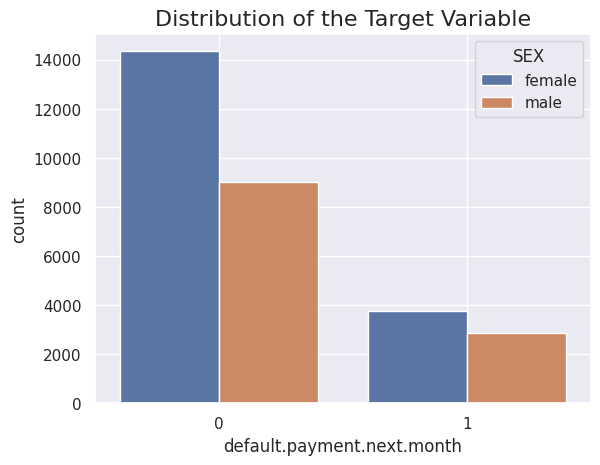

In [ ]:
# investigating the disribution of the targer variable per sex and education level
ax = sns.countplot(x="default.payment.next.month",
                   hue="SEX",
                   data=df)

# Set the title of the plot
ax.set_title("Distribution of the Target Variable",fontsize=16)

# Add gridlines
plt.grid(True)

- From the plot, we observe that the percentage of defaults is higher among *male customers*

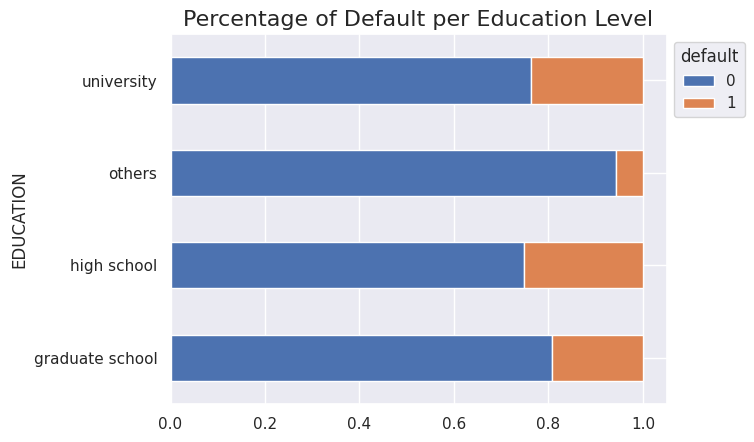

In [ ]:
# Investigate the percentage of defaults per education level

ax = df.groupby("EDUCATION")["default.payment.next.month"]\
    .value_counts(normalize=True)\
    .unstack()\
    .plot(kind="barh",stacked ="True")

# set the title
ax.set_title("Percentage of Default per Education Level", fontsize = 16)
# plot the legend
ax.legend(title="default",bbox_to_anchor=(1,1))
# Add gridlines
plt.grid(True)

- Most defaults happen among customers with a high school education while the fewest defaults happen in the others category.

#Splitting the data into training and test sets#

In [ ]:
# Select the columns you want to convert
columns_to_convert = ['PAY_0', 'PAY_2', 'PAY_3','PAY_4','PAY_5','PAY_6']

# Convert the columns to objects
df[columns_to_convert] = df[columns_to_convert].astype('object')

In [ ]:
# import the relevant libraies
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Define X and Y
X = df.copy()
y = X.pop("default.payment.next.month")

In [ ]:
# split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
# split the data into training and test sets without shuffling
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                  test_size=0.2,
                                                  shuffle=False)

In [ ]:
# split the data into training and test sets with stratification
x_train,x_test,y_train,y_test = train_test_split(X,y,
                                                  test_size=0.2,
                                                  stratify=y,
                                                 random_state=42)

In [ ]:
#verify that the ratio of the target is prserved
print("Target Distribution - Train")
print(y_train.value_counts(normalize=True).values)
print("Target Distribution - Test")
print(y_test.value_counts(normalize=True).values )

Target Distribution - Train
[0.77879167 0.22120833]
Target Distribution - Test
[0.77883333 0.22116667]


 In both sets , the percentage of payment default in **22.12%**

# Creation of a train-validation- test Split

In [ ]:
# Define the size of the validation and test sets
VALID_SIZE = 0.1
TEST_SIZE = 0.2

In [ ]:
# create the inital split training & temp
X_train,X_temp,y_train,y_temp = train_test_split(X,y,
                                                   test_size=TEST_SIZE+VALID_SIZE,
                                                 stratify=y,
                                                   random_state=42)

In [ ]:
#calculate the new test size
new_test_size = np.around(TEST_SIZE/(TEST_SIZE+VALID_SIZE),2)


In [ ]:
# create valid and test sets
X_valid,X_test,y_valid,y_test = train_test_split(X_temp,y_temp,
                                                 test_size=new_test_size,
                                                 stratify=y_temp,
                                                 random_state=42)

In [ ]:
# print the following output
print("Percentage of each dataset in each table")
print(f"train set: {len(X_train)/len(X):.2f}%")
print(f"validation set: {len(X_valid)/len(X):.2f}%")
print(f"test set: {len(X_test)/len(X):.2f}%")
print("")
print("class distribution in each set")
print(f"train set: {y_train.value_counts(normalize=True).values}")
print(f"validation set: {y_valid.value_counts(normalize=True).values}")
print(f"test set: {y_test.value_counts(normalize=True).values}")

Percentage of each dataset in each table
train set: 0.70%
validation set: 0.10%
test set: 0.20%

class distribution in each set
train set: [0.77879899 0.22120101]
validation set: [0.77878788 0.22121212]
test set: [0.77880948 0.22119052]


#Observations#
- We have verified that the inital dataset was split in the **70-10-20 ratio** & the distribution of defaults was preserved due to stratification.


# Identification and dealing with missing values

In [ ]:
# import libraries
import missingno as msno
from sklearn.impute import SimpleImputer

In [ ]:
# inspect the df
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  object 
 3   EDUCATION  29655 non-null  object 
 4   MARRIAGE   29946 non-null  object 
 5   AGE        30000 non-null  float32
 6   PAY_0      30000 non-null  object 
 7   PAY_2      30000 non-null  object 
 8   PAY_3      30000 non-null  object 
 9   PAY_4      30000 non-null  object 
 10  PAY_5      30000 non-null  object 
 11  PAY_6      30000 non-null  object 
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

<Axes: >

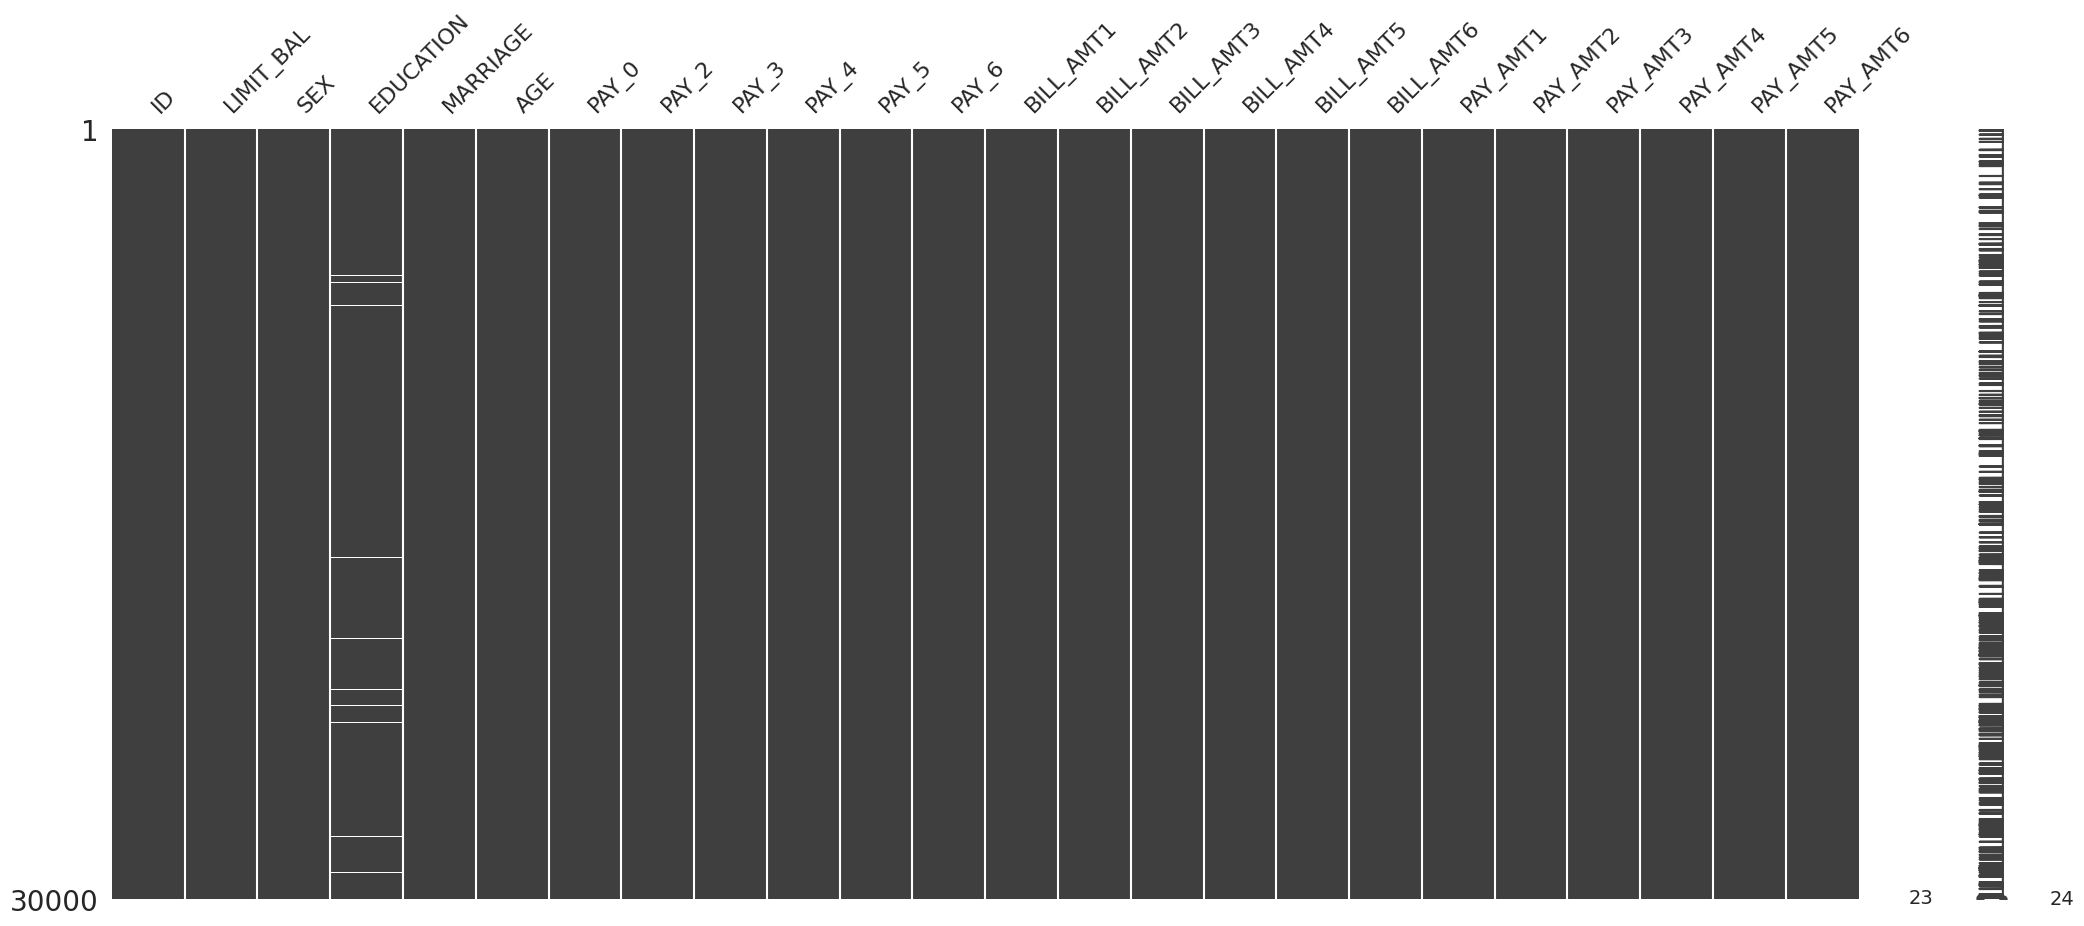

In [ ]:
# visualize the nullity of the DataFrame
msno.matrix(X)

#Observations#

- From the above plot the Education column appest to have missing data

In [ ]:
# Define the column with the missing value per data type
CAT_FEATURES =["EDUCATION"]

In [ ]:
# impute numerical features
for col in CAT_FEATURES:
  cat_imputer = SimpleImputer(strategy="most_frequent")
  cat_imputer.fit(X_train[[col]])
  X_train.loc[:, col] = cat_imputer.transform(X_train[[col]]) # Use .loc to set values in a DataFrame
  X_test.loc[:, col] = cat_imputer.transform(X_test[[col]]) # Use .loc to set values in a DataFrame

# Encoding Categorial Variables

In [ ]:
# import required libraies
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# use the label encode on the education column
COL = "EDUCATION"
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
label_encoder = LabelEncoder()
label_encoder.fit(X_train_copy[COL])
X_train_copy.loc[:,COL] = label_encoder.transform(X_train_copy[COL])
X_test_copy.loc[:,COL] = label_encoder.transform(X_test_copy[COL])

# view the head
X_test_copy[COL].head()

,EDUCATION
24775,3
9945,0
6150,1
25097,1
7745,3


In [ ]:
# select the categorial features for one hot encoding.
cat_features = X_train.select_dtypes(include="object").columns.tolist()
#view the cat features
cat_features

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [ ]:
# instatiate the OneHotEncoder Object
one_hot_encoder = OneHotEncoder(sparse_output=False,
                                handle_unknown="error",
                                drop="first")

In [ ]:
# create the column transformer
one_hot_transformer = ColumnTransformer([("one_hot",
                                          one_hot_encoder,
                                          cat_features)],
                                        remainder="passthrough",
                                        verbose_feature_names_out=False)


In [ ]:
# fit the transformer
one_hot_transformer.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6'])],
                  verbose_feature_names_out=False)

In [ ]:
#apply the transformations to both training and test sets
col_names=one_hot_transformer.get_feature_names_out()
X_train_encoded = pd.DataFrame(one_hot_transformer.transform(X_train),
                               columns=col_names,index=X_train.index)
X_test_ohe = pd.DataFrame(one_hot_transformer.transform(X_test),
                               columns=col_names,index=X_test.index)

In [ ]:
# Check the shape
col_names.shape

(80,)

- After applying one hot encoding , we have ended up with 80 columns

# Decision Tree Classifier

In [ ]:
# importing the relevant libraires
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [ ]:
tree_classifer=DecisionTreeClassifier(random_state=42)
tree_classifer.fit(X_train_encoded,y_train)
tree_classifer.predict(X_test_ohe)

array([0, 0, 0, ..., 0, 0, 0])

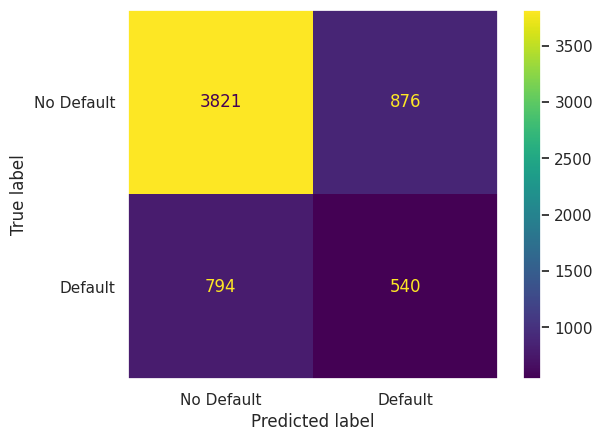

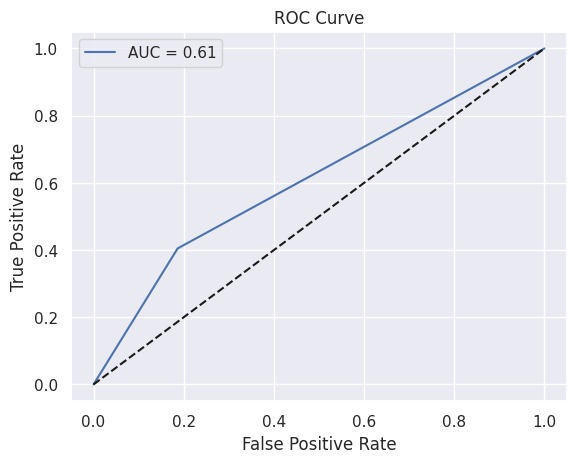

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def performance_evaluation_report(model, X_test, y_test, labels, show_plot=True):
  """
  Function to evaluate model performance and generate a classification report and confusion matrix.

  Args:
      model: Trained classifier
      X_test: Test data
      y_test: True labels for test data
      labels: Class labels
      show_plot: Boolean to control plotting of confusion matrix

  Returns:
      A dictionary with classification report and confusion matrix
  """

  # Generate predictions
  y_pred = model.predict(X_test)
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  # Classification report
  report = classification_report(y_test, y_pred, target_names=labels)

  # Confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  if show_plot:
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()
    plt.grid(False)
    plt.show()


    # ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

  # Return results
  return {"classification_report": report, "confusion_matrix": cm}

# Evaluate the Results
LABELS = ["No Default","Default"]
tree_perf = performance_evaluation_report(tree_classifer, X_test_ohe, y_test, labels=LABELS, show_plot=True)

In [ ]:
tree_perf

{'classification_report': '              precision    recall  f1-score   support\n\n  No Default       0.83      0.81      0.82      4697\n     Default       0.38      0.40      0.39      1334\n\n    accuracy                           0.72      6031\n   macro avg       0.60      0.61      0.61      6031\nweighted avg       0.73      0.72      0.73      6031\n',
 'confusion_matrix': array([[3821,  876],
        [ 794,  540]])}

[Text(0.5, 0.875, 'PAY_0_2 <= 0.5\ngini = 0.345\nsamples = 20999\nvalue = [16354, 4645]\nclass = No Default'),
 Text(0.25, 0.625, 'PAY_2_2 <= 0.5\ngini = 0.288\nsamples = 19112\nvalue = [15778, 3334]\nclass = No Default'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'PAY_2_3 <= 0.5\ngini = 0.254\nsamples = 17486\nvalue = [14877, 2609]\nclass = No Default'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'PAY_0_3 <= 0.5\ngini = 0.494\nsamples = 1626\nvalue = [901.0, 725.0]\nclass = No Default'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'PAY_3_-1 <= 0.5\ngini = 0.424\nsamples = 1887\nvalue = [576, 1311]\nclass = Default'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'PAY_5_2 <= 0.5\ngini = 0.409\nsamples = 1787\nvalue = [513, 1274]\nclass = Default'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'BILL_AMT1 <= 3196.5\n

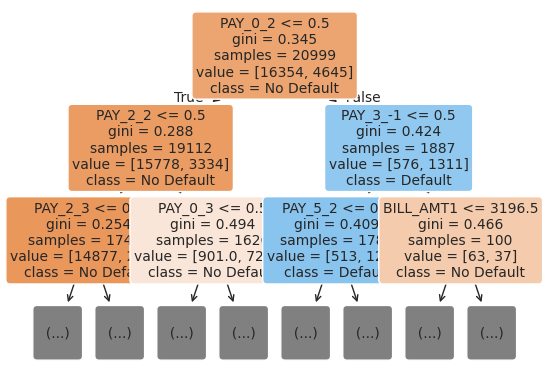

In [ ]:
# plot the first few levels of the fitted decision tree
plot_tree(tree_classifer,
          max_depth=2,
          feature_names=X_train_encoded.columns,
          class_names=["No Default","Default"],
          rounded = True,
          filled=True,
          fontsize = 10)

In [ ]:
# Calculating the precisio and recall for different thresholds
from sklearn import metrics #Import the metrics module from sklearn

y_pred_proba = tree_classifer.predict_proba(X_test_ohe)[:,1]
precision, recall,_ = metrics.precision_recall_curve(y_test, y_pred_proba)

Text(0.5, 1.0, 'Precision Recall Curve')

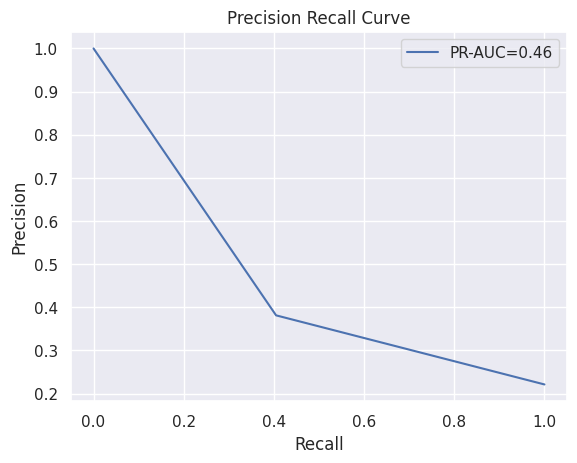

In [ ]:
# ploting the precision recall curve
ax = plt.subplot()
ax.plot(recall,precision,
        label=f"PR-AUC={metrics.auc(recall,precision):.2f}")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.legend()
ax.set_title("Precision Recall Curve")

- From the plot we observe that the In your plot, the PR-AUC is 0.41

Text(0.5, 1.0, 'Precision Recall Curve')

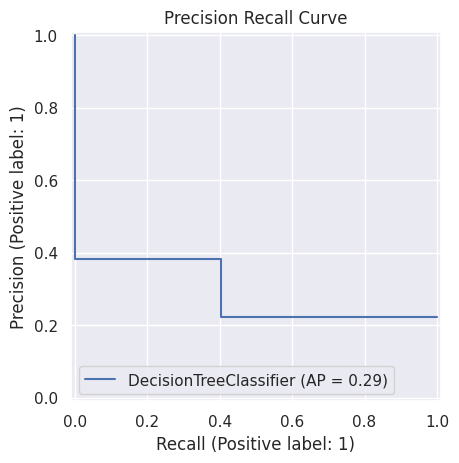

In [ ]:
# plotting a more realistic recall curve of the fitted decision tree classifer
ax = metrics.PrecisionRecallDisplay.from_estimator(tree_classifer, X_test_ohe, y_test) #Fixed spelling of from_estimator

ax.ax_.set_title("Precision Recall Curve")

# Data Pipeline

In [ ]:
# load the data, separate the target, and create the stratified train-test-split
df = pd.DataFrame(spreadsheet.sheet1.get_all_records())

# define X
X=df.copy() # Call the copy method to create a copy of the DataFrame

# define y
y=X.pop("default.payment.next.month")

# Creating the stratified train-test-split
X_train,X_test,y_train,y_test = train_test_=train_test_split(X,y,
                                                              stratify=y,
                                                              test_size=0.2,
                                                              random_state=42)

In [ ]:
# prepare lists of numerical / Categorial features
num_features = X_train.select_dtypes(include="number").columns.tolist()
cat_features = X_train.select_dtypes(include="object").columns.tolist()

In [ ]:
# Define the numerical pipeline
num_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="median"))
])

In [ ]:
# Define the Categorial pipeline
cat_list=[list(X_train[col].dropna().unique())
for col in cat_features]

cat_pipeline = Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("one_hot",OneHotEncoder(categories=cat_list,handle_unknown="error",drop="first"))
])

In [ ]:
# Define the column Transformer
preprocessor = ColumnTransformer([
    ("num",num_pipeline,num_features),
    ("cat",cat_pipeline,cat_features)
],remainder="drop")

In [ ]:
# define the full pipeline including the decision tree model
dec_tree = DecisionTreeClassifier(random_state=42)
tree_pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ("classifier",dec_tree)
])

In [ ]:
# fit pipeline to data
tree_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['ID', 'LIMIT_BAL', 'SEX',
                                                   'EDUCATION', 'MARRIAGE',
                                                   'AGE', 'PAY_0', 'PAY_2',
                                                   'PAY_3', 'PAY_4', 'PAY_5',
                                                   'PAY_6', 'BILL_AMT1',
                                                   'BILL_AMT2', 'BILL_AMT3',
                                                   'BILL_AMT4', 'BILL_AMT5',
                                                   'BILL_AMT6', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(categories=[],
                                                                                 drop='first'))]),
                                                  [])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

- 👆 This is just a preview of the pipeline

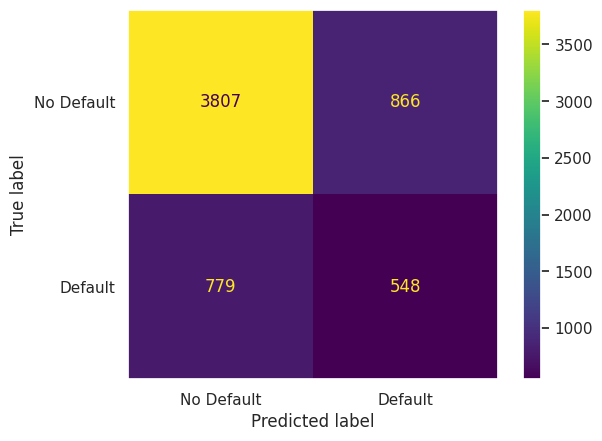

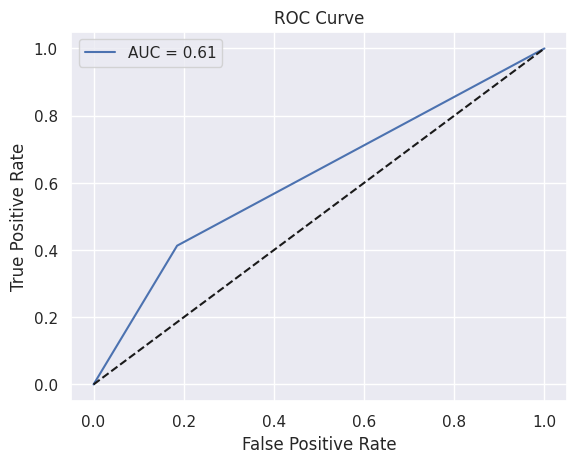

In [ ]:
# Evaluate the performance of the entire pipeline
LABELS = ["No Default","Default"]
tree_perf = performance_evaluation_report(tree_pipeline, X_test, y_test, labels=LABELS, show_plot=True)


- The performance of the model is very similar to what we achieved by carrying out all the steps separately.

# Cross Validation and Grid Searches

In [ ]:
# import libraires
from sklearn.model_selection import GridSearchCV,cross_val_score,RandomizedSearchCV,cross_validate,StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn import metrics

In [ ]:
# define a cross validation scheme
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
#Evaluate pipeline using cross validation
cross_val_score(tree_pipeline,X_train,y_train,cv=cv)

array([0.72625   , 0.72854167, 0.72916667, 0.72375   , 0.725     ])

In [ ]:
# adding accuracy,precision,recall,roc_auc
cv_scores = cross_validate(tree_pipeline,X_train,y_train,cv=cv,
                           scoring=["accuracy","precision","recall","roc_auc"])
# create a dataframe
pd.DataFrame(cv_scores)

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc
0,1.254554,0.042812,0.726250,0.387954,0.412818,0.614005
1,1.288013,0.039323,0.728542,0.389348,0.399247,0.610672
2,1.238479,0.066183,0.729167,0.391225,0.403013,0.612422
3,1.187159,0.083583,0.723750,0.384615,0.414313,0.612988
4,1.473809,0.040202,0.725000,0.378072,0.376648,0.600309


In [ ]:
# define the parameter grid
param_grid = {
    "classifier__criterion":["entropy","gini"],
    "classifier__max_depth":range(3,11),
    "classifier__min_samples_leaf":range(2,11)
}

In [ ]:
#run exhaustive grid search
classifier_gs = GridSearchCV(tree_pipeline,
                            param_grid=param_grid,
                            cv=cv,
                            scoring="recall",
                            n_jobs=-1,
                            verbose=1)

classifier_gs.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['ID',
                                                                          'LIMIT_BAL',
                                                                          'SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AM...
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(categories=[],
                                                                                                        drop='first'))]),
                                                                         [])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['entropy', 'gini'],
                         'classifier__max_depth': range(3, 11),
                         'classifier__min_samples_leaf': range(2, 11)},
             scoring='recall', verbose=1)

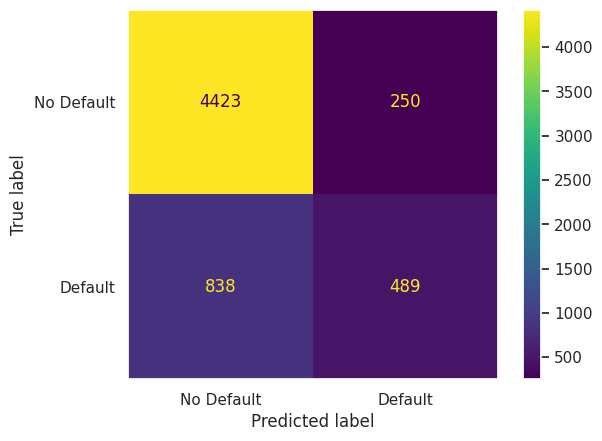

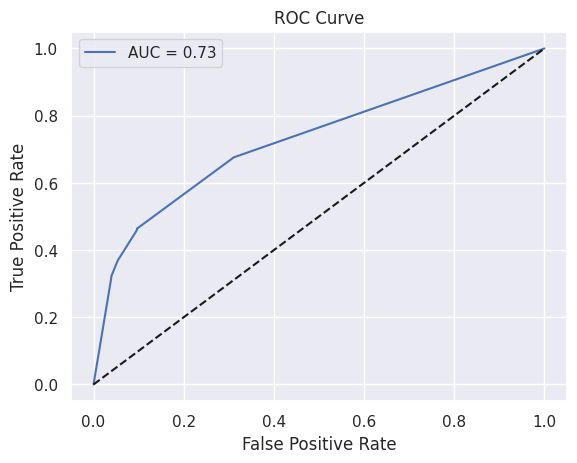

In [ ]:
# evaluate the performance of the tuned pipeline
LABELS = ["No Default","Default"]
tree_perf = performance_evaluation_report(classifier_gs, X_test, y_test, labels=LABELS, show_plot=True)

In [ ]:
# run the randomised grid search
classifier_rs = RandomizedSearchCV(tree_pipeline,
                            param_distributions=param_grid,
                            cv=cv,
                            scoring="recall",
                            n_jobs=-1,
                            verbose=1,
                            n_iter=100,
                            random_state=42)

# fit the training data
classifier_rs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['ID',
                                                                                'LIMIT_BAL',
                                                                                'SEX',
                                                                                'EDUCATION',
                                                                                'MARRIAGE',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'B...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('one_hot',
                                                                                                OneHotEncoder(categories=[],
                                                                                                              drop='first'))]),
                                                                               [])])),
                                             ('classifier',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'classifier__criterion': ['entropy',
                                                                  'gini'],
                                        'classifier__max_depth': range(3, 11),
                                        'classifier__min_samples_leaf': range(2, 11)},
                   random_state=42, scoring='recall', verbose=1)

In [ ]:
print(f"Best parameters: {classifier_rs.best_params_}")
print(f"Recall (Training set): {classifier_rs.best_score_:.4f}")
print(f"Recall (Test set): {metrics.recall_score(y_test, classifier_rs.predict(X_test)):.4f}")

Best parameters: {'classifier__min_samples_leaf': 8, 'classifier__max_depth': 3, 'classifier__criterion': 'gini'}
Recall (Training set): 0.3767
Recall (Test set): 0.3685


In [ ]:
# import relevant libraies
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# finding the best hyperparamaters with our decision tree pipleine
classifer_sh = HalvingGridSearchCV(tree_pipeline,
                            param_grid=param_grid,
                            cv=cv,
                            scoring="recall",
                            n_jobs=-1,
                            verbose=1,
                            min_resources="exhaust",
                            factor=3)

# fit the training data
classifer_sh.fit(X_train,y_train)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 296
max_resources_: 24000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 144
n_resources: 296
Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------
iter: 1
n_candidates: 48
n_resources: 888
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------
iter: 2
n_candidates: 16
n_resources: 2664
Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


----------
iter: 3
n_candidates: 6
n_resources: 7992
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 23976
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingGridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                    estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='median'))]),
                                                                                ['ID',
                                                                                 'LIMIT_BAL',
                                                                                 'SEX',
                                                                                 'EDUCATION',
                                                                                 'MARRIAGE',
                                                                                 'AGE',
                                                                                 'PAY_0',
                                                                                 'PAY_2',
                                                                                 'PAY_3',
                                                                                 'PAY_4',
                                                                                 'PAY_5',
                                                                                 'PAY_6',
                                                                                 'BILL_AMT1',
                                                                                 'BILL_AMT2',
                                                                                 '...
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('one_hot',
                                                                                                 OneHotEncoder(categories=[],
                                                                                                               drop='first'))]),
                                                                                [])])),
                                              ('classifier',
                                               DecisionTreeClassifier(random_state=42))]),
                    n_jobs=-1,
                    param_grid={'classifier__criterion': ['entropy', 'gini'],
                                'classifier__max_depth': range(3, 11),
                                'classifier__min_samples_leaf': range(2, 11)},
                    scoring='recall', verbose=1)

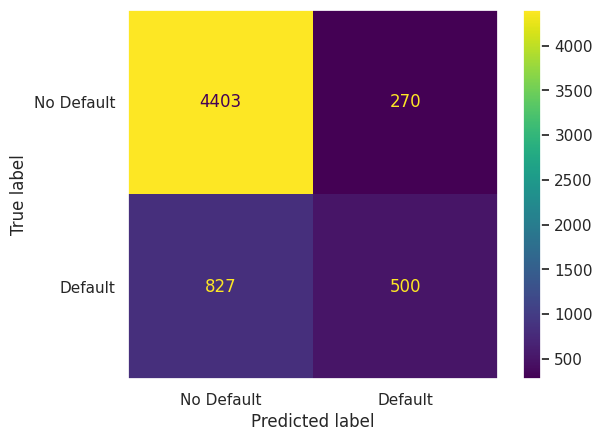

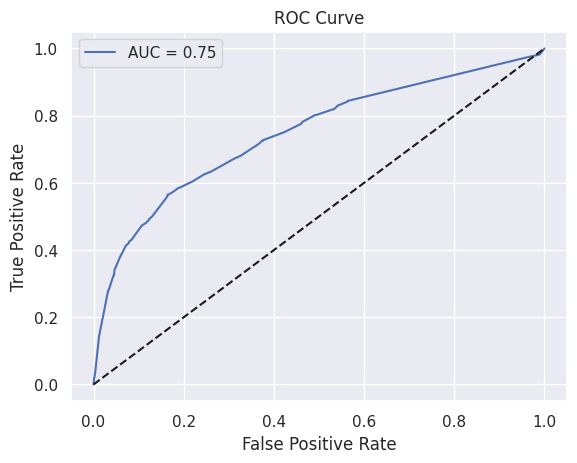

In [ ]:
# evaluate the performance of the tuned pipeline
LABELS = ["No Default","Default"]
tree_perf = performance_evaluation_report(classifer_sh, X_test, y_test, labels=LABELS, show_plot=True)

# Grid Search with multiple classifiers

In [ ]:
# import randomforest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# define param grid
param_grid = [
    {"classifier": [RandomForestClassifier(random_state=42)],
     "classifier__n_estimators": np.linspace(100, 500, 10, dtype=int),
     "classifier__max_depth": range(3, 11)},

    {"classifier": [DecisionTreeClassifier(random_state=42)],
     "classifier__criterion": ["entropy", "gini"],
     "classifier__max_depth": range(3, 11),
     "classifier__min_samples_leaf": range(2, 11)}
]


In [ ]:
classifier_gs_2 = GridSearchCV(tree_pipeline, param_grid,
scoring="recall", cv=cv,
n_jobs=-1, verbose=1)

classifier_gs_2.fit(X_train, y_train)

print(f"Best parameters: {classifier_gs_2.best_params_}")

print(f"Recall (Training set): {classifier_gs_2.best_score_:.4f}")

print(f"Recall (Test set): {metrics.recall_score(y_test, classifier_gs_2.predict(X_test)):.4f}")

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
Best parameters: {'classifier': DecisionTreeClassifier(random_state=42), 'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 2}
Recall (Training set): 0.3767
Recall (Test set): 0.3685


In [ ]:
# print all the considered hyperparameters
pd.DataFrame(classifier_gs_2.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__max_depth,param_classifier__n_estimators,param_classifier__criterion,param_classifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
157,0.471747,0.064214,0.029860,0.007461,DecisionTreeClassifier(random_state=42),3,NaN,gini,7.0,{'classifier': DecisionTreeClassifier(random_s...,0.381715,0.380414,0.370056,0.381356,0.370056,0.376720,0.005457,1
158,0.486351,0.051795,0.024230,0.005225,DecisionTreeClassifier(random_state=42),3,NaN,gini,8.0,{'classifier': DecisionTreeClassifier(random_s...,0.381715,0.380414,0.370056,0.381356,0.370056,0.376720,0.005457,1
152,0.298346,0.029401,0.017111,0.004118,DecisionTreeClassifier(random_state=42),3,NaN,gini,2.0,{'classifier': DecisionTreeClassifier(random_s...,0.381715,0.380414,0.370056,0.381356,0.370056,0.376720,0.005457,1
153,0.274568,0.004164,0.014043,0.000683,DecisionTreeClassifier(random_state=42),3,NaN,gini,3.0,{'classifier': DecisionTreeClassifier(random_s...,0.381715,0.380414,0.370056,0.381356,0.370056,0.376720,0.005457,1
159,0.516460,0.045284,0.029429,0.006500,DecisionTreeClassifier(random_state=42),3,NaN,gini,9.0,{'classifier': DecisionTreeClassifier(random_s...,0.381715,0.380414,0.370056,0.381356,0.370056,0.376720,0.005457,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,12.846588,0.734638,0.167607,0.052964,RandomForestClassifier(random_state=42),3,455.0,NaN,NaN,{'classifier': RandomForestClassifier(random_s...,0.256362,0.239171,0.243879,0.240113,0.222222,0.240350,0.010944,220
3,6.721854,1.121048,0.099177,0.028096,RandomForestClassifier(random_state=42),3,233.0,NaN,NaN,{'classifier': RandomForestClassifier(random_s...,0.255419,0.238230,0.243879,0.241055,0.222222,0.240161,0.010705,221
2,5.731318,0.676239,0.084435,0.028147,RandomForestClassifier(random_state=42),3,188.0,NaN,NaN,{'classifier': RandomForestClassifier(random_s...,0.252592,0.237288,0.242938,0.242938,0.225047,0.240161,0.009018,222
9,14.286881,0.672080,0.163325,0.055754,RandomForestClassifier(random_state=42),3,500.0,NaN,NaN,{'classifier': RandomForestClassifier(random_s...,0.257304,0.239171,0.242938,0.240113,0.219397,0.239785,0.012108,223


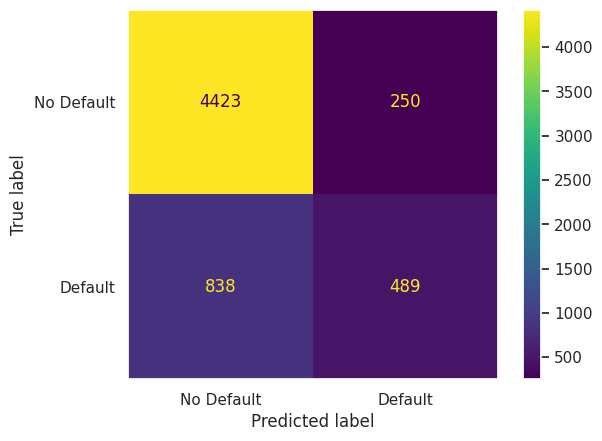

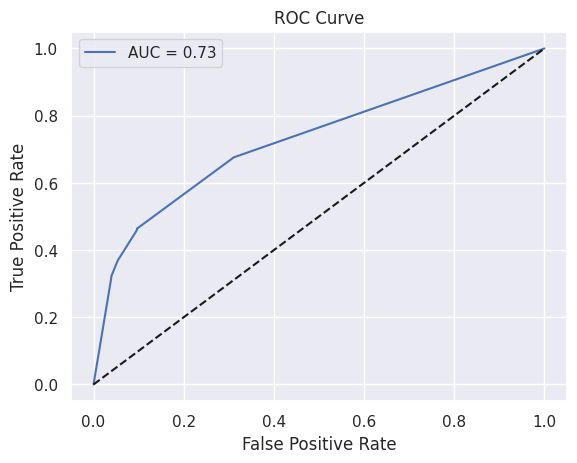

In [ ]:
# evaluate the performance of the tuned pipeline
LABELS = ["No Default","Default"]
tree_perf = performance_evaluation_report(classifier_gs_2, X_test, y_test, labels=LABELS, show_plot=True)